* [1.Description des données](#dd)
* [2.Nettoyage](#ne)
* [3.Choix des variables cibles (les émissions de CO2 et  la consommation totale d’énergie)](#cv)
* [4.Analyse exploratoire](#ae)
* [5.Sauvegarde des données dans un fichier csv](#cs)

In [348]:
import pandas as pd
import numpy as np
import warnings
import missingno as msno
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt 
import folium
from folium import plugins
warnings.filterwarnings('ignore')

# 1.Description des données <a class="anchor" id="dd"></a>

In [349]:
df=pd.read_csv('2016_Building_Energy_Benchmarking.csv')

In [350]:
df.shape

(3376, 46)

In [351]:
df.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,...,Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,...,1.156514e+06,3946027.0,12764.52930,1276453.0,False,NaN,Compliant,NaN,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,...,9.504252e+05,3242851.0,51450.81641,5145082.0,False,NaN,Compliant,NaN,295.86,2.86
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,...,1.451544e+07,49526664.0,14938.00000,1493800.0,False,NaN,Compliant,NaN,2089.28,2.19
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,...,8.115253e+05,2768924.0,18112.13086,1811213.0,False,NaN,Compliant,NaN,286.43,4.67
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,...,1.573449e+06,5368607.0,88039.98438,8803998.0,False,NaN,Compliant,NaN,505.01,2.88


In [352]:
df.columns

Index(['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType',
       'PropertyName', 'Address', 'City', 'State', 'ZipCode',
       'TaxParcelIdentificationNumber', 'CouncilDistrictCode', 'Neighborhood',
       'Latitude', 'Longitude', 'YearBuilt', 'NumberofBuildings',
       'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking',
       'PropertyGFABuilding(s)', 'ListOfAllPropertyUseTypes',
       'LargestPropertyUseType', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA',
       'YearsENERGYSTARCertified', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)',
       'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)',
       'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)',
       'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)',
       'NaturalGas(kBtu)', 'DefaultData', 'Comments', 'ComplianceStatus',
       'Outlier

In [353]:
df['BuildingType'].unique()

array(['NonResidential', 'Nonresidential COS', 'Multifamily MR (5-9)',
       'SPS-District K-12', 'Campus', 'Multifamily LR (1-4)',
       'Multifamily HR (10+)', 'Nonresidential WA'], dtype=object)

In [354]:
#batiments non destinés à l'habitation
df = df[~df['BuildingType'].str.contains("Multifamily")]
df['BuildingType'].unique()

array(['NonResidential', 'Nonresidential COS', 'SPS-District K-12',
       'Campus', 'Nonresidential WA'], dtype=object)

<AxesSubplot:>

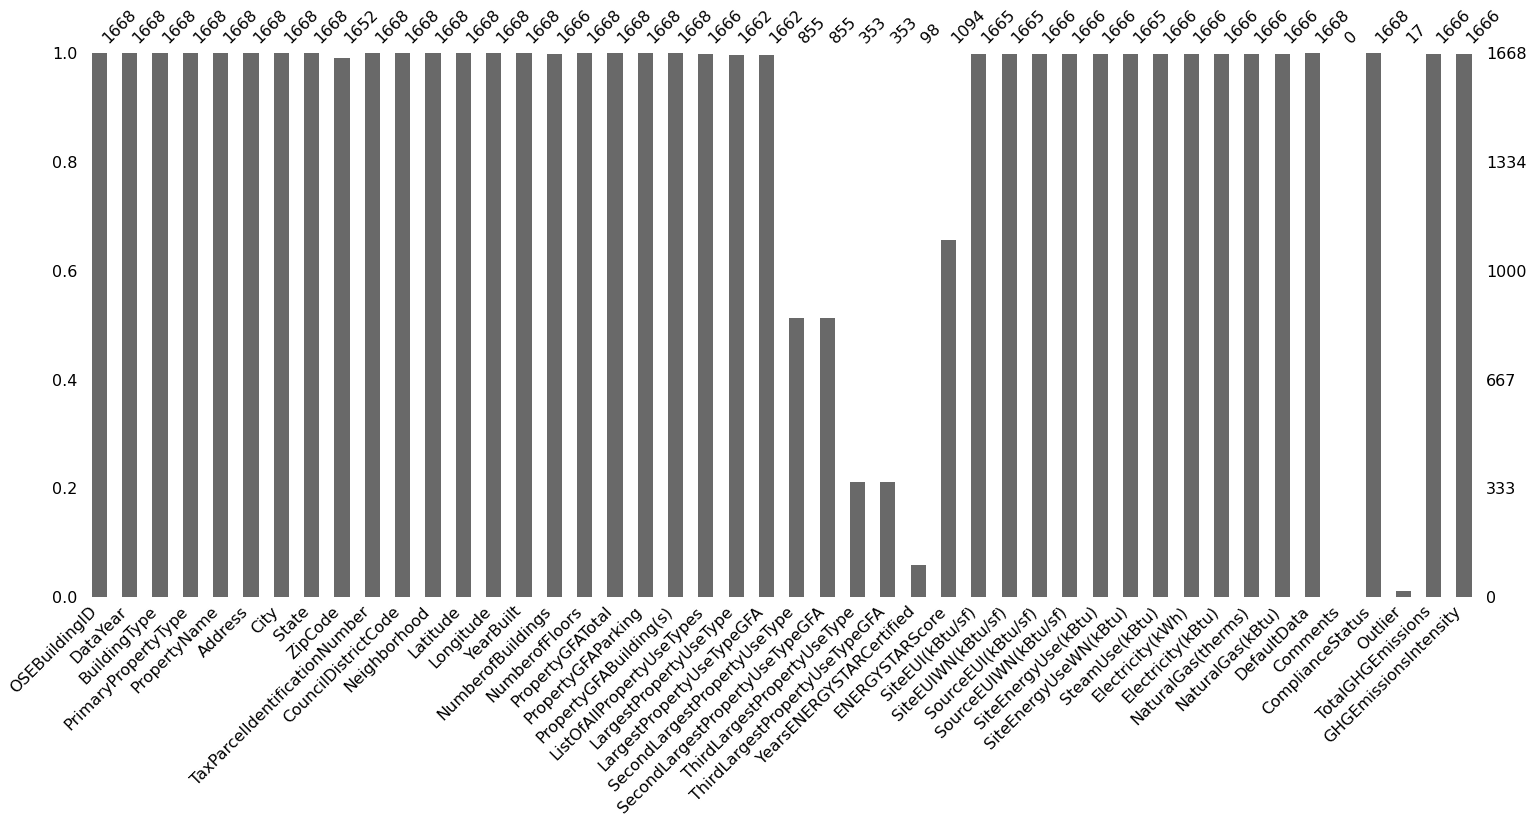

In [355]:
msno.bar(df)

# 2.Nettoyage<a class="anchor" id="ne"></a>

In [356]:
df.shape

(1668, 46)

In [357]:
#supprimer les lignes avec TotalGHGEmissions<0
df = df[df['TotalGHGEmissions'] >= 0]

In [358]:
#Ici c'est pour vérifier le nombre des lignes qui vérifient la condition
somme=df['Electricity(kBtu)']+df['NaturalGas(kBtu)']+df['SteamUse(kBtu)']
df[df['TotalGHGEmissions']==somme].shape

(6, 46)

In [359]:
#Supprimer les lignes qui vérifient la condition précédentes
idss = df.loc[(df.TotalGHGEmissions == somme) ].OSEBuildingID

df = df[~df.OSEBuildingID.isin(idss)]

In [360]:
df.shape

(1659, 46)

In [361]:
# remplir les nan des variables signalés par la valeur la plus fréquente
df[['LargestPropertyUseType',           
'LargestPropertyUseTypeGFA',          
'SecondLargestPropertyUseType',       
'SecondLargestPropertyUseTypeGFA',    
'ThirdLargestPropertyUseType',        
'ThirdLargestPropertyUseTypeGFA',   
'YearsENERGYSTARCertified', 
'SiteEUI(kBtu/sf)',                   
'SiteEUIWN(kBtu/sf)',           
'ENERGYSTARScore',    
'SiteEnergyUseWN(kBtu)','Outlier',]]=df[['LargestPropertyUseType',           
'LargestPropertyUseTypeGFA',          
'SecondLargestPropertyUseType',       
'SecondLargestPropertyUseTypeGFA',    
'ThirdLargestPropertyUseType',        
'ThirdLargestPropertyUseTypeGFA',   
'YearsENERGYSTARCertified',
'SiteEUI(kBtu/sf)',                   
'SiteEUIWN(kBtu/sf)', 
'ENERGYSTARScore',    
'SiteEnergyUseWN(kBtu)','Outlier']].fillna(df.mode().iloc[0])

<AxesSubplot:>

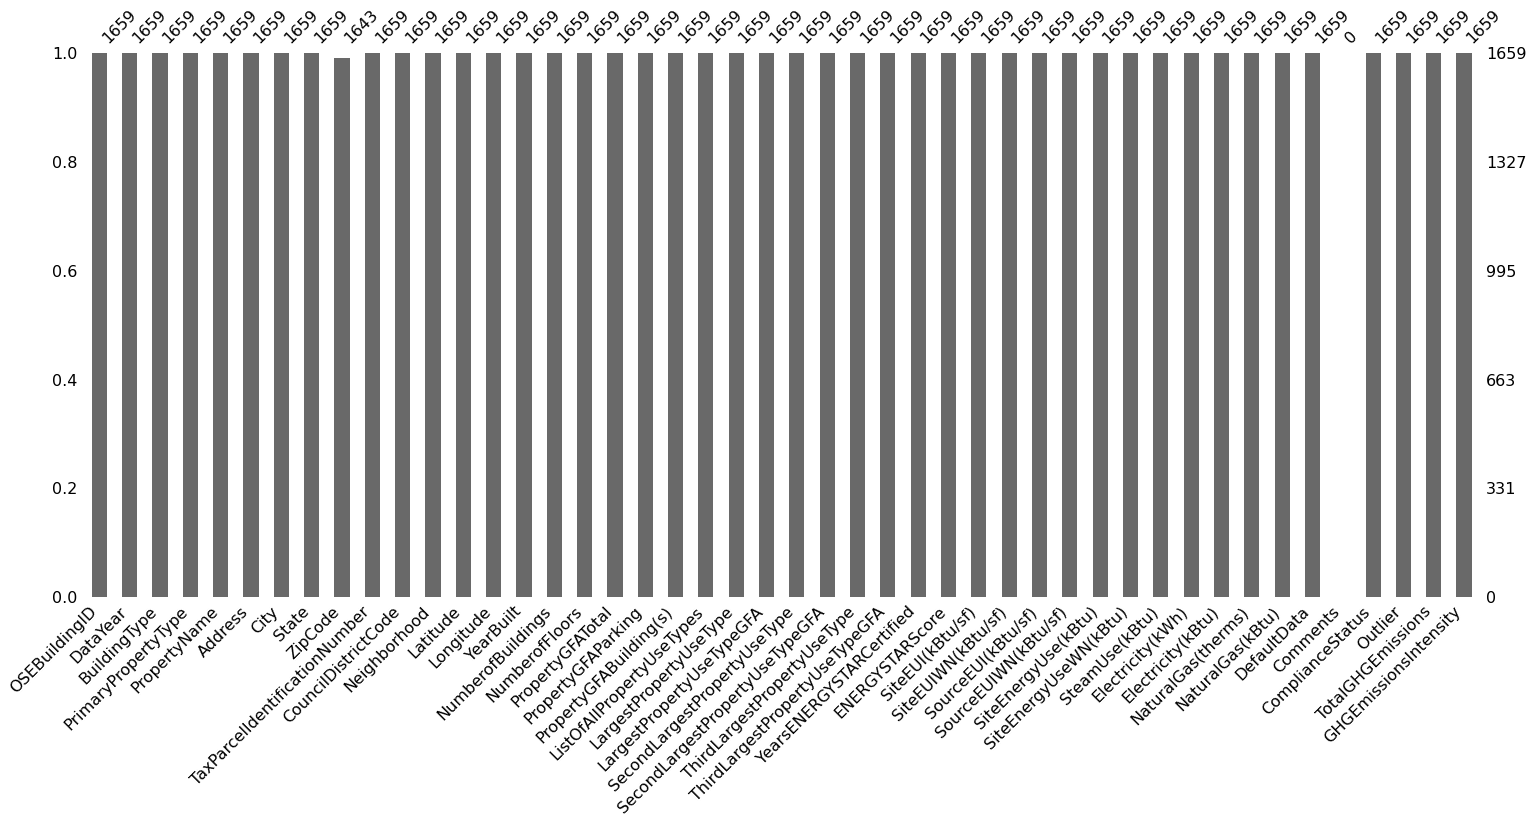

In [362]:
msno.bar(df)

In [363]:
font_title = {'family': 'serif',
             'color':  '#114b98',
             'weight': 'bold',
            'size': 18,
            }

# 3.Choix des variables cibles (les émissions de CO2 et  la consommation totale d’énergie)<a class="anchor" id="cv"></a>

In [364]:
#'GHGEmissionsIntensity',TotalGHGEmissions
#'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)'
#SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf)

In [365]:
traget1='TotalGHGEmissions'
target2='SiteEnergyUse(kBtu)'

### Distribution de la cible 'TotalGHGEmissions'

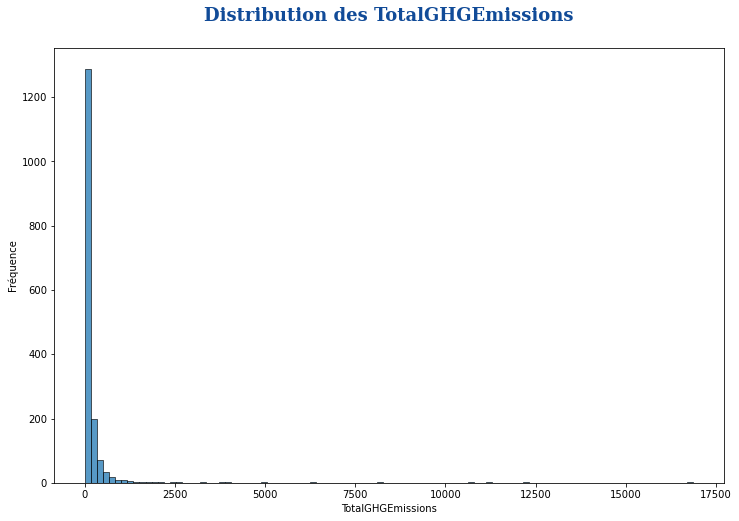

In [366]:
#Distribution de 'TotalGHGEmissions'
fig = plt.figure(figsize=(12,8))
ax = sns.histplot(data=df, x='TotalGHGEmissions', bins=100)

ax.set_xlabel("TotalGHGEmissions")
ax.set_ylabel("Fréquence")
plt.title(f"Distribution des TotalGHGEmissions\n", fontdict=font_title)
plt.show()

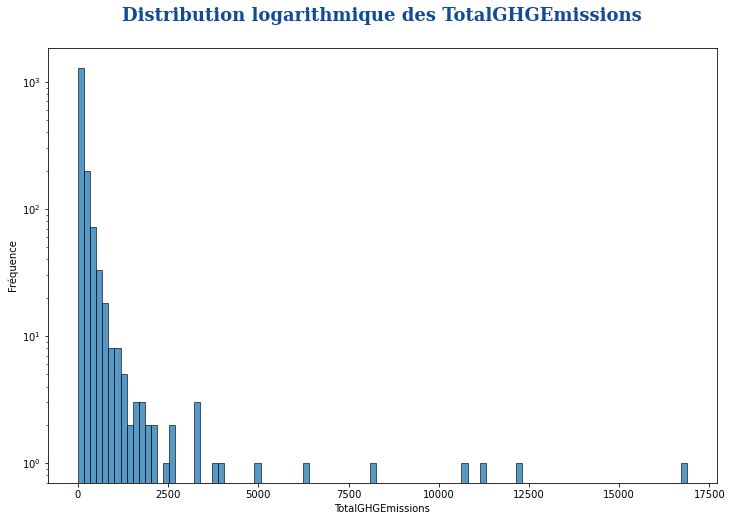

In [367]:
#Distribution logarithmique de 'TotalGHGEmissions'
fig = plt.figure(figsize=(12,8))
ax = sns.histplot(data=df, x='TotalGHGEmissions', bins=100)
ax.set_yscale('log')
ax.set_xlabel("TotalGHGEmissions")
ax.set_ylabel("Fréquence")
plt.title(f"Distribution logarithmique des TotalGHGEmissions\n", fontdict=font_title)
plt.show()

**Observation**
<br>
la cible 'TotalGHGEmissions' ne suit pas la loi normale.

### Distribution de la cible 'SiteEnergyUse(kBtu)'

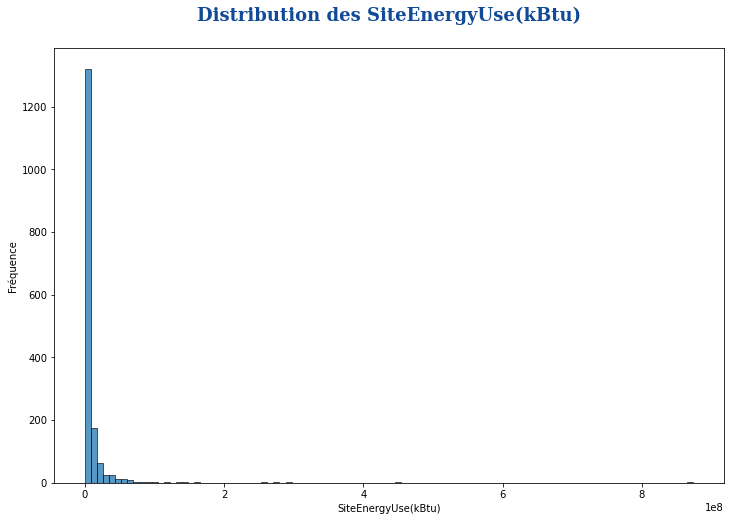

In [368]:
#Distribution de 'SiteEnergyUse(kBtu)'
fig = plt.figure(figsize=(12,8))
ax = sns.histplot(data=df, x='SiteEnergyUse(kBtu)', bins=100)

ax.set_xlabel("SiteEnergyUse(kBtu)")
ax.set_ylabel("Fréquence")
plt.title(f"Distribution des SiteEnergyUse(kBtu)\n", fontdict=font_title)
plt.show()

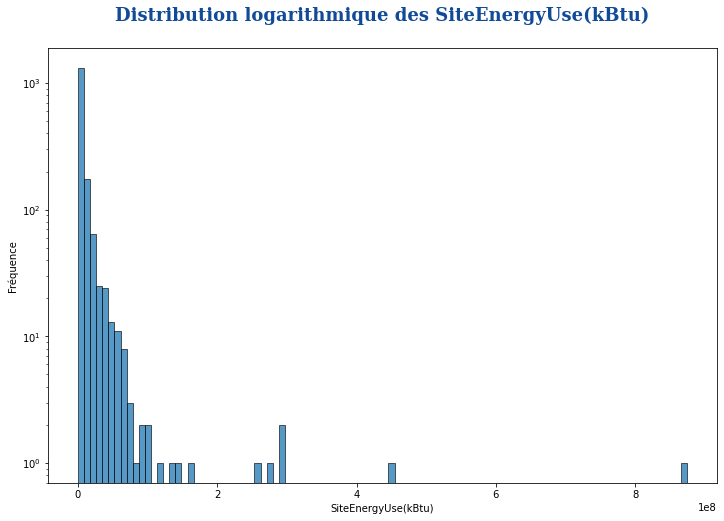

In [369]:
#Distribution logarithmique de 'SiteEnergyUse(kBtu)'
fig = plt.figure(figsize=(12,8))
ax = sns.histplot(data=df, x='SiteEnergyUse(kBtu)',bins=100)
ax.set_yscale('log')
ax.set_xlabel("SiteEnergyUse(kBtu)")
ax.set_ylabel("Fréquence")
plt.title(f"Distribution logarithmique des SiteEnergyUse(kBtu)\n", fontdict=font_title)
plt.show()

**Observation**
<br>
la cible 'SiteEnergyUse(kBtu)' ne suit pas la loi normale.

# 4.Analyse exploratoire <a class="anchor" id="ae"></a>

In [370]:
DataYear=df['DataYear']

### Analyse univariée

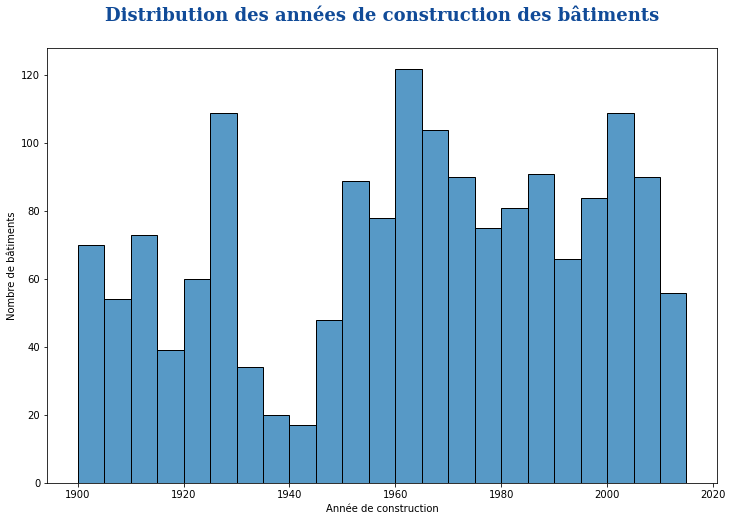

In [371]:
fig = plt.figure(figsize=(12,8))
ax = sns.histplot(data=df, x='YearBuilt', bins=int((df.YearBuilt.max() - df.YearBuilt.min())/5))
ax.set_xlabel("Année de construction")
ax.set_ylabel("Nombre de bâtiments")
plt.title(f"Distribution des années de construction des bâtiments\n", fontdict=font_title)
plt.show()

In [372]:
#ajouter une colonne tranche_date selon la variale YearBuilt
# create a list of our conditions
conditions = [
    (df['YearBuilt'] < 1950),
    (df['YearBuilt'] >= 1950) & (df['YearBuilt'] < 2000),
    (df['YearBuilt'] >= 2000)
    ]

# create a list of the values we want to assign for each condition
values = ['tranche_date1', 'tranche_date2', 'tranche_date3']

# create a new column and use np.select to assign values to it using our lists as arguments
df['tranche_date'] = np.select(conditions, values)

In [373]:
df['tranche_date'] .unique()

array(['tranche_date1', 'tranche_date2', 'tranche_date3'], dtype=object)

**Observations**
<br>
La plupart des batiments sont construits après 1950

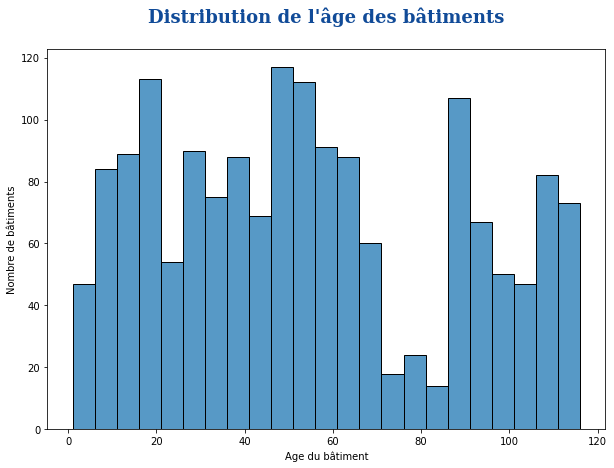

In [374]:
#Ajout de la variable age 
df['BuildingAge'] = DataYear - df['YearBuilt']
# df.drop('YearBuilt', axis=1, inplace=True)

fig = plt.figure(figsize=(10,7))
ax = sns.histplot(data=df, x='BuildingAge', bins=int((df.BuildingAge.max() - df.BuildingAge.min())/5))
ax.set_xlabel("Age du bâtiment")
ax.set_ylabel("Nombre de bâtiments")
plt.title(f"Distribution de l'âge des bâtiments\n", fontdict=font_title)
plt.show()

In [375]:
li=list(df['YearBuilt'].unique())
type(li)

list

**Observations**
<br>
La plupart des batimentssont agés moins de 70 ans.

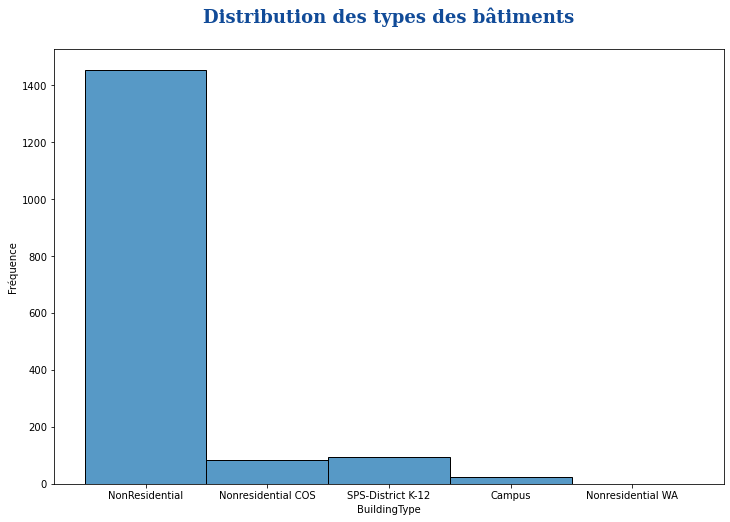

In [376]:
fig = plt.figure(figsize=(12,8))
ax = sns.histplot(data=df, x='BuildingType')
ax.set_xlabel("BuildingType")
ax.set_ylabel("Fréquence")
plt.title(f"Distribution des types des bâtiments\n", fontdict=font_title)
plt.show()

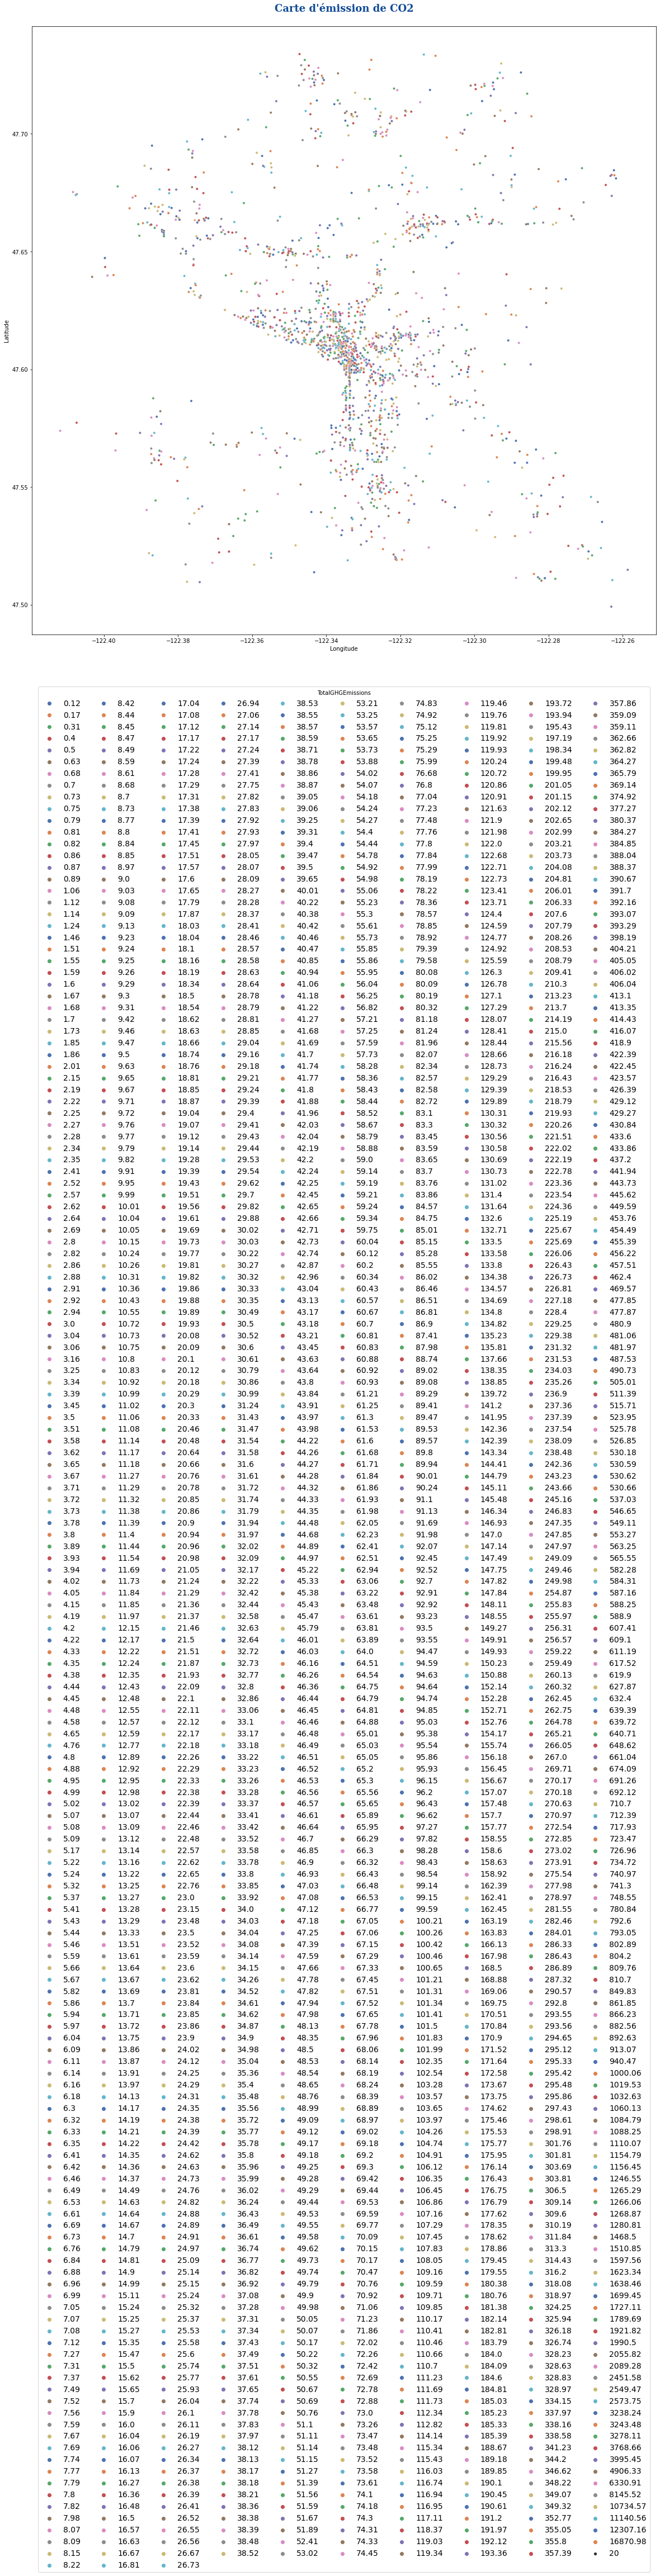

In [377]:

fig = plt.gcf()
fig.set_size_inches( 20, 20)
plt.title(f"Carte d'émission de CO2\n",fontdict=font_title)
g =sns.scatterplot(x='Longitude',y='Latitude',
              hue='TotalGHGEmissions',
              palette="deep",
              legend='brief',
              data=df,
              size=20)

#place legend in center right of plot
plt.legend(loc='upper center', title='TotalGHGEmissions',prop={'size':13.89}, 
           bbox_to_anchor=(0.5, -0.08), ncol=10)

            

**Observations**
<br>

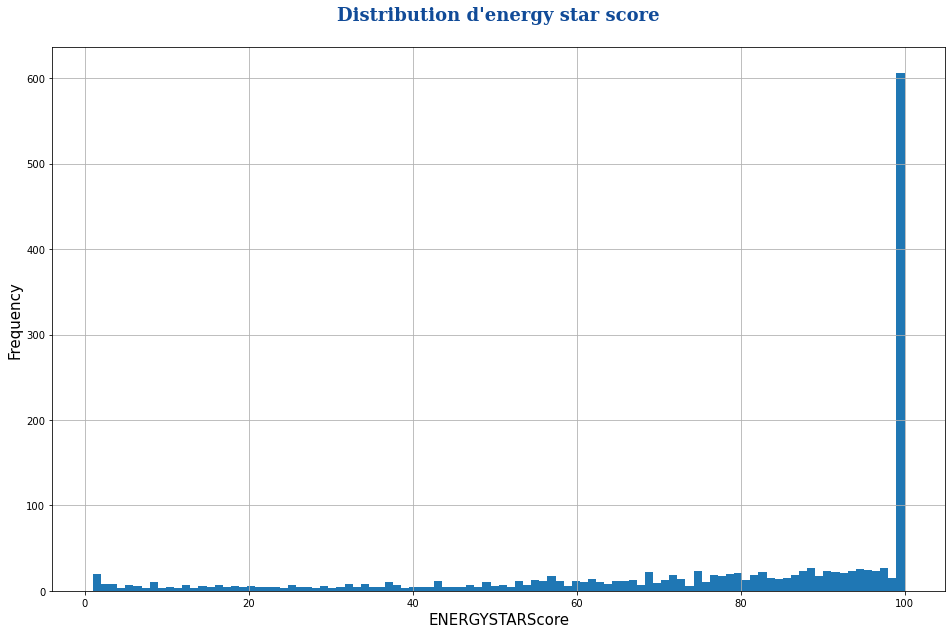

In [378]:
df['ENERGYSTARScore'].hist(bins=100)
plt.xlabel("ENERGYSTARScore", fontsize=15)
plt.ylabel("Frequency",fontsize=15)
plt.title(f"Distribution d'energy star score\n",fontdict=font_title)
fig = plt.gcf()
fig.set_size_inches( 16, 10)

### Les outliers

In [379]:
df['BuildingType'].unique()

array(['NonResidential', 'Nonresidential COS', 'SPS-District K-12',
       'Campus', 'Nonresidential WA'], dtype=object)

**Remarque**
<br>
'BuildingType':Number of buildings included in the property's report. In cases where a property is reporting as a campus, multiple buildings may be included in one report.

In [380]:
df[(df['BuildingType']!='Campus') & (df['NumberofBuildings']>1)][['BuildingType','NumberofBuildings']]


,BuildingType,NumberofBuildings
36,NonResidential,3.0
80,NonResidential,2.0
98,NonResidential,4.0
117,NonResidential,3.0
124,NonResidential,6.0
167,NonResidential,6.0
170,NonResidential,9.0
319,NonResidential,2.0
353,NonResidential,2.0
364,NonResidential,6.0


In [381]:
#suppression des lignes avec 'BuildingType']!='Campus' et 'NumberofBuildings'>1
#find the OSEBuildingID that doesn't match the condition and filter the original DataFrame by them
ids = df.loc[(df.BuildingType != 'Campus') & (df.NumberofBuildings >1)].OSEBuildingID

df = df[~df.OSEBuildingID.isin(ids)]

In [382]:
df[(df['BuildingType']!='Campus') & (df['NumberofBuildings']>1)][['BuildingType','NumberofBuildings']]


,BuildingType,NumberofBuildings


In [383]:
df.shape

(1620, 48)

In [384]:
df['ComplianceStatus'].unique()

array(['Compliant', 'Error - Correct Default Data', 'Missing Data',
       'Non-Compliant'], dtype=object)

**Note**
<br>
Penser à supprimer les lignes avec ComplianceStatus égal à 'Error - Correct Default Data'

In [385]:
ids_ = df.loc[(df.ComplianceStatus == 'Error - Correct Default Data')].OSEBuildingID
len(ids_)

df = df[~df.OSEBuildingID.isin(ids_)]

In [386]:
df.shape

(1533, 48)

### Analyse bivariée

[None]

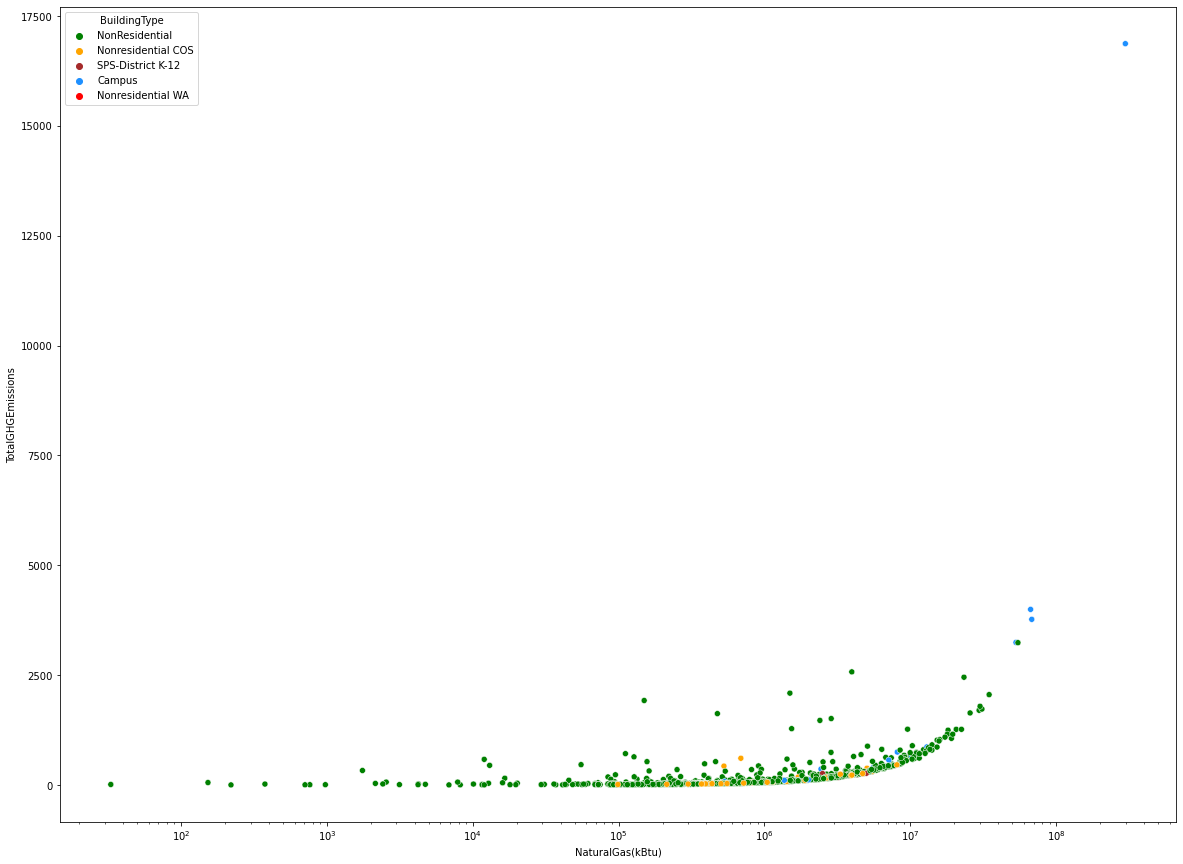

In [387]:
fig = plt.gcf()
fig.set_size_inches( 20, 15)
g =sns.scatterplot(x="NaturalGas(kBtu)", y="TotalGHGEmissions", hue="BuildingType",
              data=df, 
                    palette=['green','orange','brown','dodgerblue','red'], legend='full')
g.set(xscale="log")

[None]

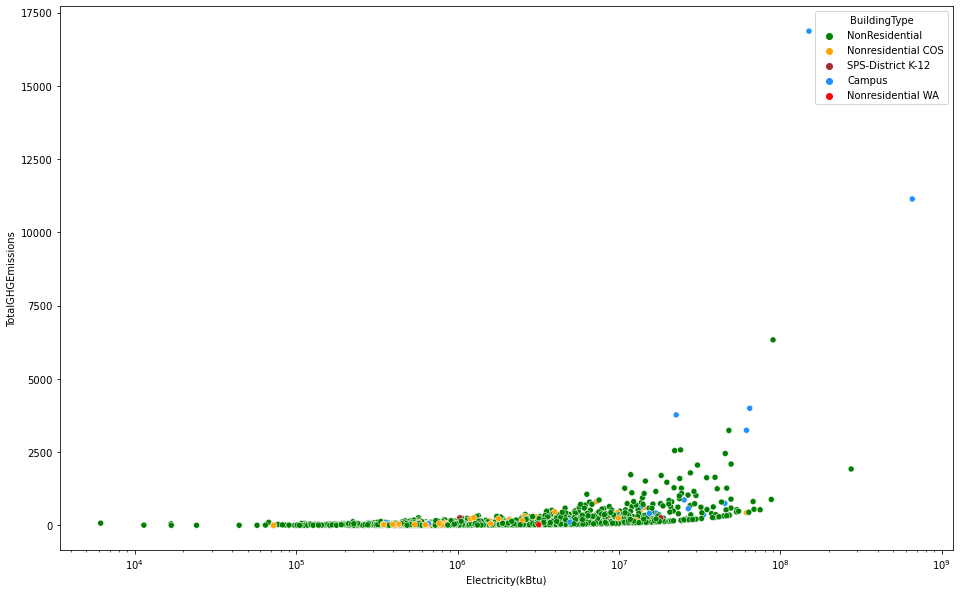

In [388]:
fig = plt.gcf()
fig.set_size_inches( 16, 10)
g =sns.scatterplot(x="Electricity(kBtu)", y="TotalGHGEmissions", hue="BuildingType",
              data=df, 
                    palette=['green','orange','brown','dodgerblue','red'], legend='full')
g.set(xscale="log")

[None]

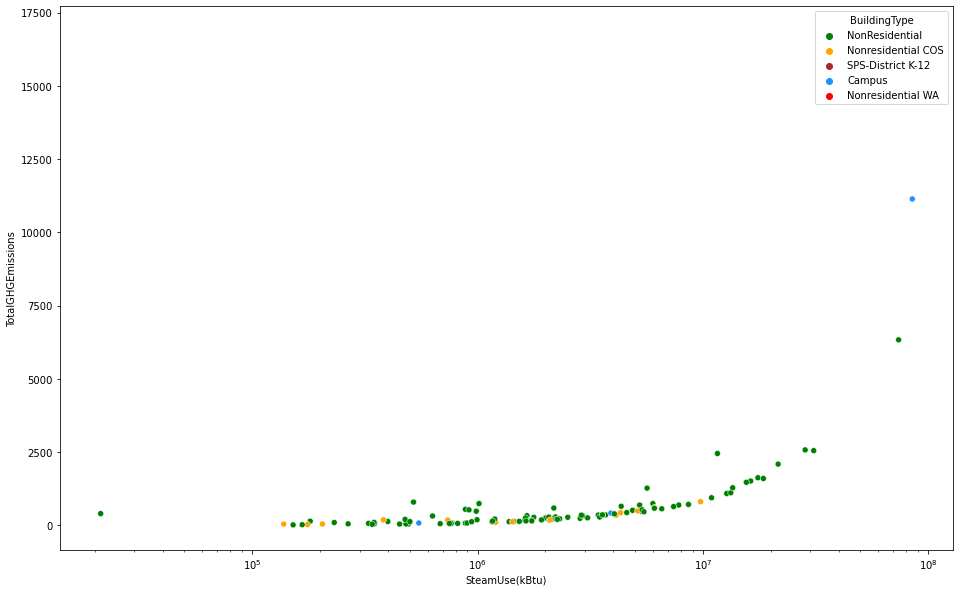

In [389]:
fig = plt.gcf()
fig.set_size_inches( 16, 10)
g =sns.scatterplot(x="SteamUse(kBtu)", y="TotalGHGEmissions", hue="BuildingType",
              data=df, 
                    palette=['green','orange','brown','dodgerblue','red'], legend='full')
g.set(xscale="log")

[None]

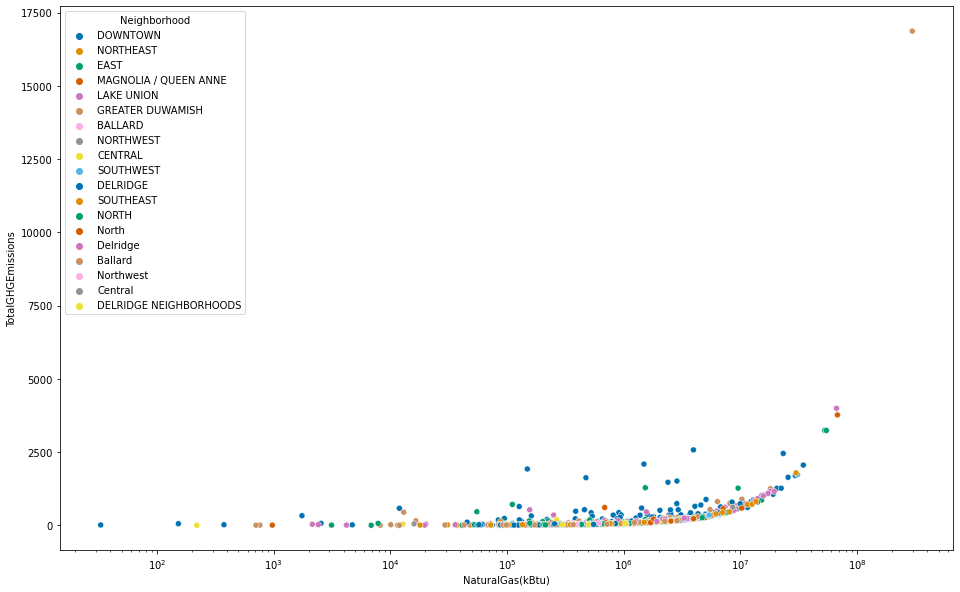

In [390]:
fig = plt.gcf()
fig.set_size_inches( 16, 10)
g =sns.scatterplot(x="NaturalGas(kBtu)", y="TotalGHGEmissions", hue="Neighborhood",
              data=df, 
                    palette='colorblind', legend='full')
g.set(xscale="log")

[None]

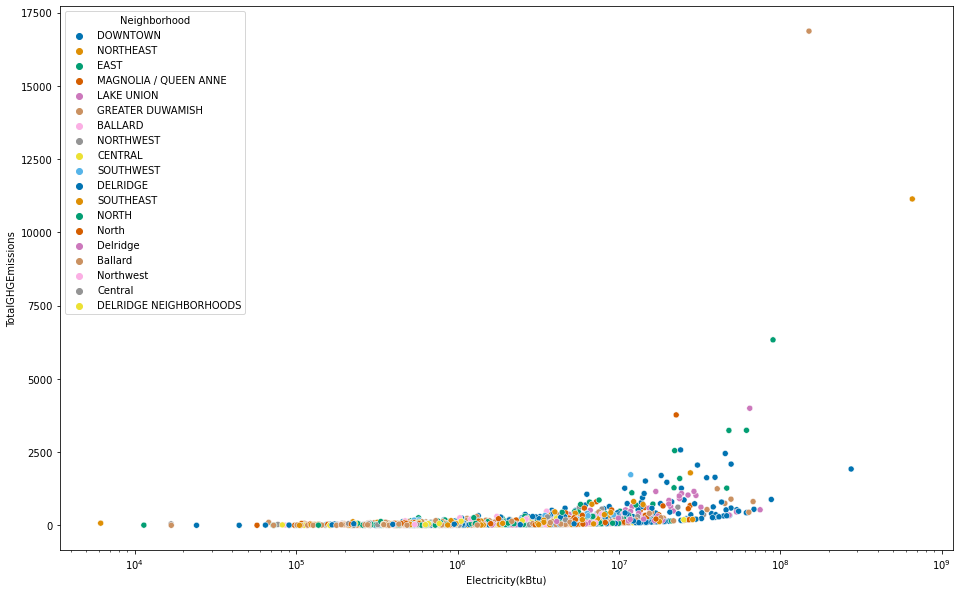

In [391]:
fig = plt.gcf()
fig.set_size_inches( 16, 10)
g =sns.scatterplot(x="Electricity(kBtu)", y="TotalGHGEmissions", hue="Neighborhood",
              data=df, 
                    palette='colorblind', legend='full')
g.set(xscale="log")

[None]

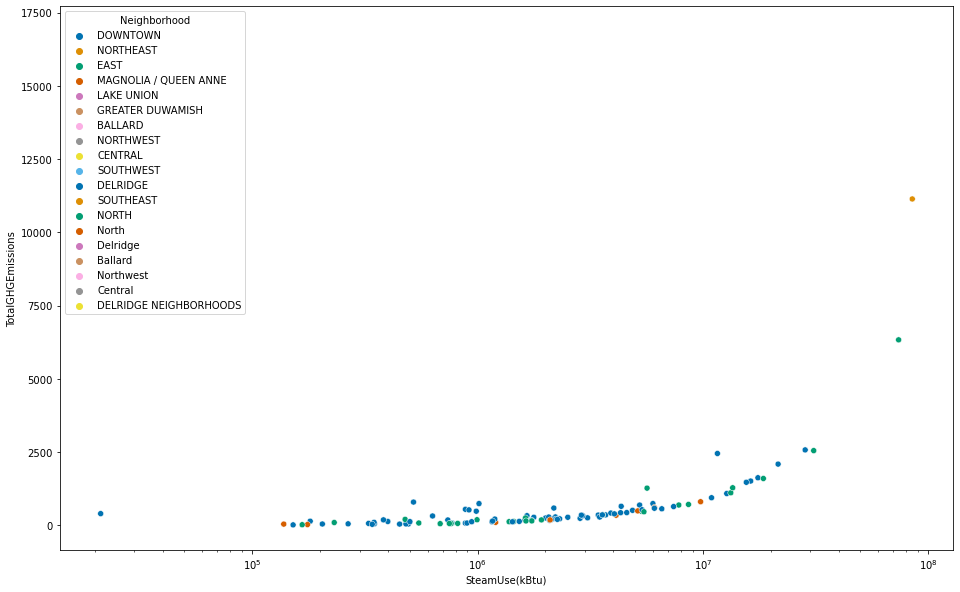

In [392]:
fig = plt.gcf()
fig.set_size_inches( 16, 10)
g =sns.scatterplot(x="SteamUse(kBtu)", y="TotalGHGEmissions", hue="Neighborhood",
              data=df, 
                    palette='colorblind', legend='full')
g.set(xscale="log")

In [393]:
df['Neighborhood'].unique()

array(['DOWNTOWN', 'NORTHEAST', 'EAST', 'MAGNOLIA / QUEEN ANNE',
       'LAKE UNION', 'GREATER DUWAMISH', 'BALLARD', 'NORTHWEST',
       'CENTRAL', 'SOUTHWEST', 'DELRIDGE', 'SOUTHEAST', 'NORTH', 'North',
       'Delridge', 'Ballard', 'Northwest', 'Central',
       'DELRIDGE NEIGHBORHOODS'], dtype=object)

In [394]:
df[['OSEBuildingID', 'BuildingType', 
     'ListOfAllPropertyUseTypes',
    'PrimaryPropertyType',
       'LargestPropertyUseType', 
       'SecondLargestPropertyUseType', 
       'ThirdLargestPropertyUseType']]

,OSEBuildingID,BuildingType,ListOfAllPropertyUseTypes,PrimaryPropertyType,LargestPropertyUseType,SecondLargestPropertyUseType,ThirdLargestPropertyUseType
0,1,NonResidential,Hotel,Hotel,Hotel,Parking,Office
1,2,NonResidential,"Hotel, Parking, Restaurant",Hotel,Hotel,Parking,Restaurant
2,3,NonResidential,Hotel,Hotel,Hotel,Parking,Office
3,5,NonResidential,Hotel,Hotel,Hotel,Parking,Office
4,8,NonResidential,"Hotel, Parking, Swimming Pool",Hotel,Hotel,Parking,Swimming Pool
...,...,...,...,...,...,...,...
3370,50221,Nonresidential COS,Other - Recreation,Other,Other - Recreation,Parking,Office
3372,50223,Nonresidential COS,Other - Recreation,Other,Other - Recreation,Parking,Office
3373,50224,Nonresidential COS,"Fitness Center/Health Club/Gym, Other - Recrea...",Other,Other - Recreation,Fitness Center/Health Club/Gym,Swimming Pool
3374,50225,Nonresidential COS,"Fitness Center/Health Club/Gym, Food Service, ...",Mixed Use Property,Other - Recreation,Fitness Center/Health Club/Gym,Pre-school/Daycare


In [395]:
#df[['BuildingType','NumberofBuildings']]


### Analyse multivariée

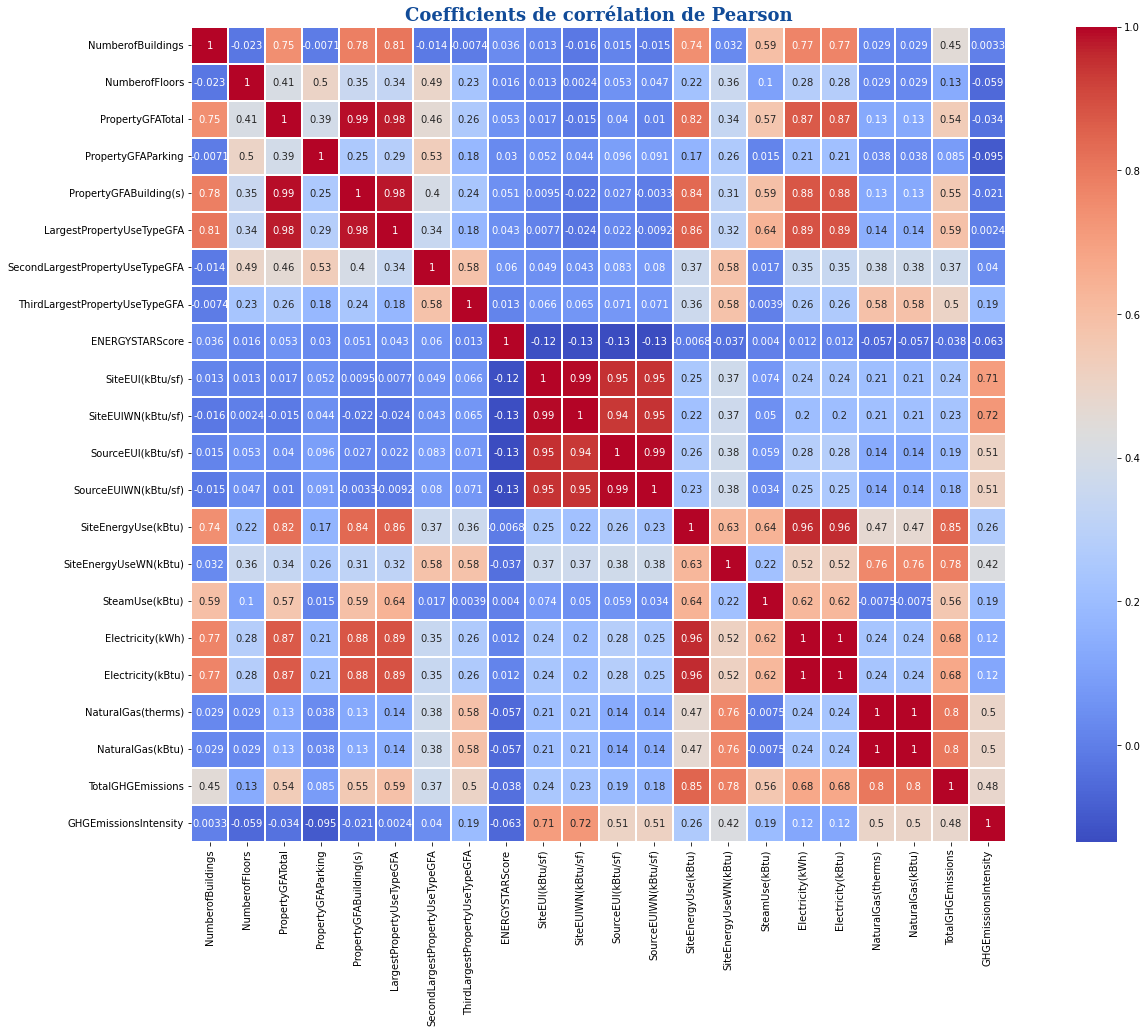

In [396]:
#look for correlated variables
fig=plt.figure(figsize=(25,15))


corr_mat = df[['NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking', 'PropertyGFABuilding(s)', 
              'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseTypeGFA', 'ENERGYSTARScore', 
               'SiteEUI(kBtu/sf)', 'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)', 'SiteEnergyUse(kBtu)', 
               'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)', 'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)', 
               'NaturalGas(kBtu)', 'TotalGHGEmissions', 'GHGEmissionsIntensity']].corr()
sns.heatmap(corr_mat, square=True, linewidths=0.01, annot=True, cmap='coolwarm')
plt.title("Coefficients de corrélation de Pearson", fontdict=font_title)
plt.show()

In [397]:
#Correlated_cols=

In [398]:
df.columns

Index(['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType',
       'PropertyName', 'Address', 'City', 'State', 'ZipCode',
       'TaxParcelIdentificationNumber', 'CouncilDistrictCode', 'Neighborhood',
       'Latitude', 'Longitude', 'YearBuilt', 'NumberofBuildings',
       'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking',
       'PropertyGFABuilding(s)', 'ListOfAllPropertyUseTypes',
       'LargestPropertyUseType', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA',
       'YearsENERGYSTARCertified', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)',
       'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)',
       'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)',
       'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)',
       'NaturalGas(kBtu)', 'DefaultData', 'Comments', 'ComplianceStatus',
       'Outlier

### Regroupement des classes

In [399]:
groups={'Health':['Hospital','Laboratory','Medical Office','Senior Care Community'],
        #'Education':['University', 'K-12 School'],
       'Commerce':['Retail Store','Supermarket / Grocery Store', 'Distribution Center','Restaurant',  'Refrigerated Warehouse','Warehouse','Self-Storage Facility'],
       'Various':['Hotel', 'Other', 'Mid-Rise Multifamily', 'Mixed Use Property','Worship Facility','Residence Hall',
                 'Small- and Mid-Sized Office','Large Office','Low-Rise Multifamily','High-Rise Multifamily',
                   'University', 'K-12 School']
       }
       #'Office':['Small- and Mid-Sized Office','Large Office'],
       #'Multifamily':['Low-Rise Multifamily','High-Rise Multifamily']}


def categorise(row):  
    for key ,value in groups.items():
        if row['PrimaryPropertyType'] in value:
            return key

        
df['groups_type'] = df.apply(lambda row: categorise(row), axis=1)

In [400]:

groups_buildings={'NonResidential':['NonResidential', 'Nonresidential COS','Nonresidential WA'],'Other':['SPS-District K-12',
       'Campus']}
#categorise('BuildingType',row)
def f_groups_building(row):  
    for key ,value in groups_buildings.items():
        if row['BuildingType'] in value:
            return key
df['groups_building'] = df.apply(lambda row:f_groups_building(row), axis=1)

In [401]:
df[df['ComplianceStatus']=='Missing Data'].shape

(11, 50)

In [405]:
groups_ComplianceStatus={'Compliant':['Compliant'],'Other':['Missing Data', 'Non-Compliant']}
def f_groups_ComplianceStatus(row):  
    for key ,value in groups_ComplianceStatus.items():
        if row['ComplianceStatus'] in value:
            return key
df['groups_ComplianceStatus'] = df.apply(lambda row:f_groups_ComplianceStatus(row), axis=1)

In [407]:
df['groups_ComplianceStatus'].unique()

array(['Compliant', 'Other'], dtype=object)

In [408]:
#Les variables retenues pour la suite 
retained_cols=['OSEBuildingID','groups_building','groups_type','NumberofBuildings','NumberofFloors',
              'ENERGYSTARScore','SteamUse(kBtu)','Electricity(kBtu)','NaturalGas(kBtu)',
               'groups_ComplianceStatus','tranche_date','BuildingAge','SiteEnergyUse(kBtu)','TotalGHGEmissions']

In [409]:
df=df[retained_cols]

# 5.Sauvegarde des données dans un fichier csv<a class="anchor" id="cs"></a>

In [410]:
#sauvegarde des données cleanées
df.to_csv('prepared_data.csv', sep='\t',index=False)